Taking the residuals of the AO linear regression (taking as features CAG and CAG^2), we bin all samples in the following quantiles:
- Much after than expected
- After than expected
- As expected
- Before than expected
- Much before than expected

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

#--------# Directories #--------#

# Change working directory
os.chdir('/pool01/projects/abante_lab/ao_prediction_enrollhd_2024/')

# Data directory
feat_dir = "features/"

/pool01/conda/envs/enrollhd/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
residuals = pd.read_csv(feat_dir + 'AO_quadratic_residuals.txt', header=None).values

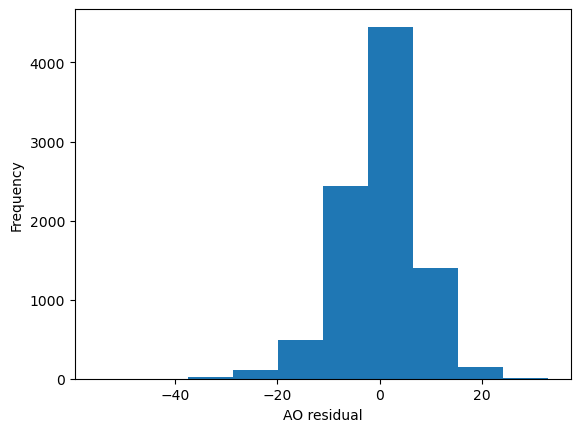

In [3]:
plt.hist(residuals)
plt.xlabel('AO residual')
plt.ylabel('Frequency')
plt.show()


## Using quantiles

In [3]:
residuals = pd.read_csv(feat_dir + 'AO_quadratic_residuals.txt', header=None).squeeze()
residual_bins = pd.qcut(residuals, q=5, labels=False)  # Labels are 0 to 4 by default

# Define a colormap
colors = sns.color_palette("viridis", n_colors=5)

labels_strings = ['Much earlier than expected', 'Earlier than expected', 'As expected', 'Later than expected', 'Much later than expected']

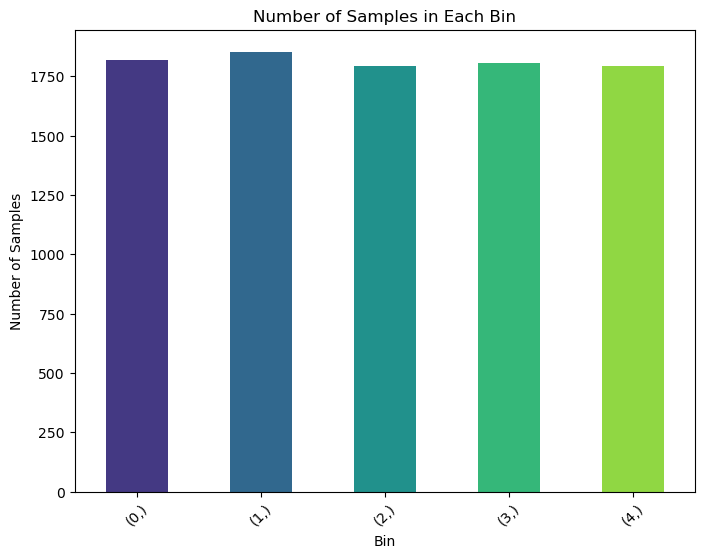

In [57]:
# Count the number of samples in each bin
bin_counts = pd.DataFrame(residual_bins).value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
bin_counts.plot(kind='bar', color=colors)
plt.title('Number of Samples in Each Bin')
plt.xlabel('Bin')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

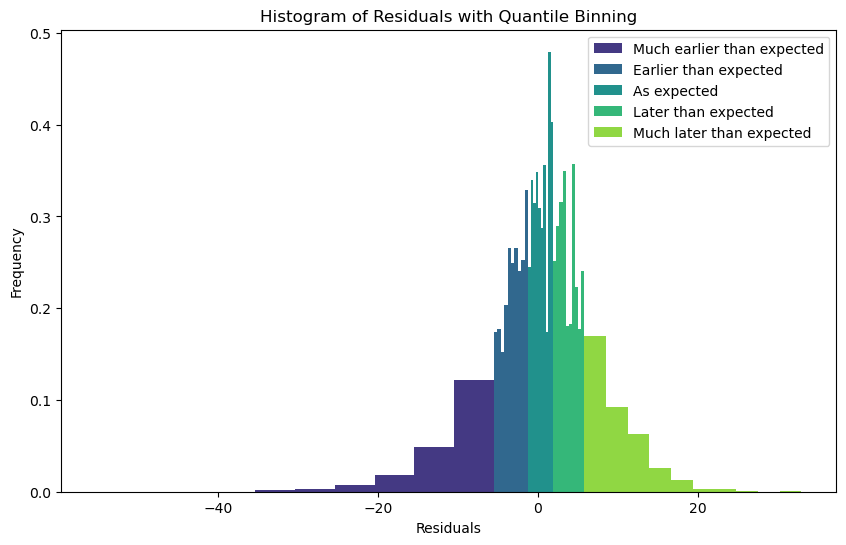

In [4]:
# Plot histogram
plt.figure(figsize=(10, 6))
for i in range(5):  # Loop through each bin
    plt.hist(residuals[residual_bins == i], density=True, color=colors[i],  label=labels_strings[i])

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals with Quantile Binning")
plt.legend()
plt.savefig("/pool01/projects/abante_lab/ao_prediction_enrollhd_2024/ml_results/classification/v2/paperfigs/class_histogram.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [60]:
np.savetxt(feat_dir + 'binned_ao.txt', residual_bins, fmt='%d')